In [522]:
# basic data science imports
import pandas as pd
import seaborn as sns #this is the plotting library I'll be using 
import pandas as pd #"as pd" means that we can use the abbreviation in commands
import math
import matplotlib.pyplot as plt #we need Matplotlib for setting the labels in the Seaborn graphs

# visualisation
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

df1 = pd.read_csv('steps.csv', delimiter=';')
df2 = pd.read_csv('survey.csv')

### Assignment 1: exploratory data analysis

In [523]:
import pandas as pd

df1 = pd.read_csv('steps.csv', delimiter=';')
df2 = pd.read_csv('survey.csv')

df = pd.merge(df2, df1,  on = 'id') #'app' is the common identifier (ID)
df = df[(df['weight'] < 200) & (df['weight'] > 35)]
df = df.fillna(0)
df.head()


,id,city,gender,age,hh_size,education,education_1,height,weight,20-6-2013,...,4-5-2014,5-5-2014,6-5-2014,7-5-2014,8-5-2014,9-5-2014,10-5-2014,11-5-2014,12-5-2014,13-5-2014
0,1,Bordeaux,Male,25-34,4,4,Master or doctorate,178.0,98.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2,Lille,Male,35-44,1,3,Bachelor,180.0,77.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,3,Montpellier,Male,25-34,2,2,Master or doctorate,180.0,83.0,0.0,...,3914.0,4364.0,0.0,0.0,0.0,6227.0,4567.0,2567.0,1129.0,0.0
3,4,Lyon,Male,<25,1,1,Bachelor,178.0,80.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,5,Montpellier,Female,25-34,3,4,Bachelor,167.0,61.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [524]:
steps_per_participant = df.loc[:,'20-6-2013':].mean(axis=1)
df["average-steps"] = steps_per_participant
print(df)


      id         city  gender    age  hh_size  education          education_1  \
0      1     Bordeaux    Male  25-34        4          4  Master or doctorate   
1      2        Lille    Male  35-44        1          3             Bachelor   
2      3  Montpellier    Male  25-34        2          2  Master or doctorate   
3      4         Lyon    Male    <25        1          1             Bachelor   
4      5  Montpellier  Female  25-34        3          4             Bachelor   
..   ...          ...     ...    ...      ...        ...                  ...   
924  925        Lille  Female  45-54        3          4  Master or doctorate   
925  926        Lille    Male    <25        3          5             Bachelor   
926  927  Montpellier    Male  35-44        2          2             Bachelor   
927  928        Lille  Female  55-64        1          1          High school   
928  929         Lyon    Male  25-34        2          2          High school   

     height  weight  20-6-2

/Users/stefanvanbrummelen/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


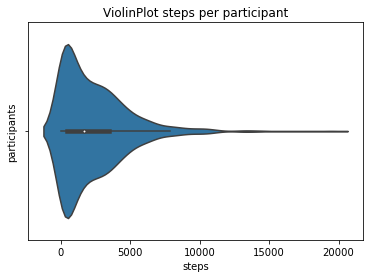

In [525]:
import matplotlib.pyplot as plt
import seaborn as sb

sns.violinplot(steps_per_participant)
plt.title('ViolinPlot steps per participant')
plt.xlabel('steps')
plt.ylabel('participants')
plt.show()

/Users/stefanvanbrummelen/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


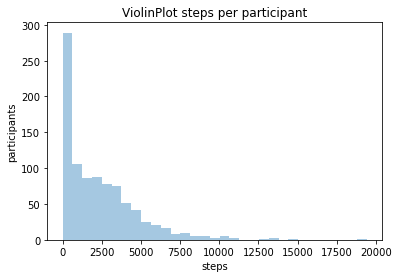

In [526]:
sns.distplot(steps_per_participant, kde=False)
plt.title('ViolinPlot steps per participant')
plt.xlabel('steps')
plt.ylabel('participants')
plt.show()

Mean steps are: 2347.462824015413 steps
Median steps are: 1660.1798780487804 steps
Median steps are: 2412.5696552949466 steps


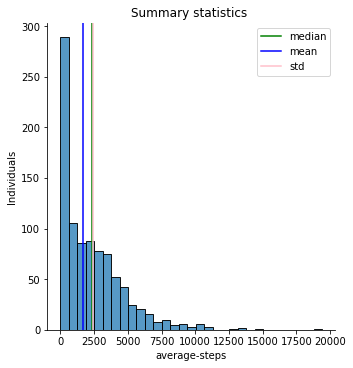

In [527]:
import numpy as np

mean = df['average-steps'].mean()
median = df['average-steps'].median()
std = np.std(df['average-steps'])

print(f'Mean steps are: {mean} steps')
print(f'Median steps are: {median} steps')
print(f'Median steps are: {std} steps')


sns.displot(df['average-steps'], kde=False)
plt.title('Summary statistics ')
plt.ylabel('Individuals')
plt.axvline(mean, 0, 100, color='green', label='median') #This adds a vertical line at x-position median_size, from y = 0 to y = 100 
plt.axvline(median, 0, 100, color='blue', label='mean') 
plt.axvline(std, 0, 100, color='pink', label='std') 
plt.legend() #This adds a legend. It works automatically because I've set the labels in the previous lines
plt.show()

##### We can characterize the distribution as follows:
* Normality: the distribution is not normal at all (it's the curve). Most values are [x].
* Variation: there is little variation. Most values are [x].
* Modality: there is one peak
* Skewness: the distribution is skewed to the right. However, most values are 0 so the skew is minimal.
* Outliers: there are not really outliers. There are no values that are very far from the trend.

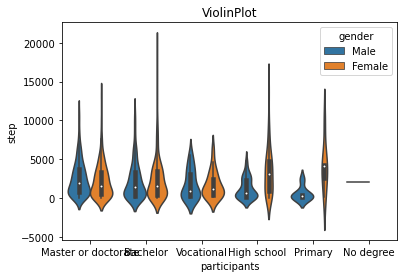

In [528]:
plt.title('ViolinPlot')
sns.violinplot(x="education_1", hue="gender", y="average-steps", data=df)
plt.xlabel('participants')
plt.ylabel('step')
plt.show()

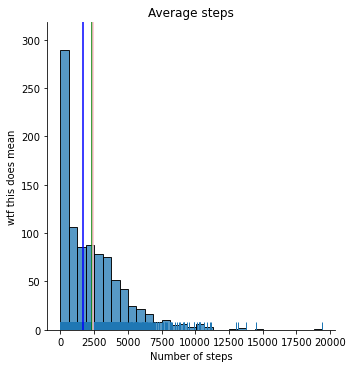

In [529]:
sns.displot(df['average-steps'], rug=True)

plt.axvline(mean, 0, 100, color='green', label='median') #This adds a vertical line at x-position median_size, from y = 0 to y = 100 
plt.axvline(median, 0, 100, color='blue', label='mean') 
plt.axvline(std, 0, 100, color='pink', label='std') 

plt.title('Average steps')
plt.xlabel('Number of steps')
plt.ylabel('wtf this does mean')
plt.show()

### Assignment 2: correlation 

In [530]:
Bmi = df['weight'] / ((df['height'] / 100) * (df['height'] / 100))
df['BMI'] = Bmi
df = df[df["BMI"] < 60]
df



,id,city,gender,age,hh_size,education,education_1,height,weight,20-6-2013,...,6-5-2014,7-5-2014,8-5-2014,9-5-2014,10-5-2014,11-5-2014,12-5-2014,13-5-2014,average-steps,BMI
0,1,Bordeaux,Male,25-34,4,4,Master or doctorate,178.0,98.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5133.875000,30.930438
1,2,Lille,Male,35-44,1,3,Bachelor,180.0,77.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2826.371951,23.765432
2,3,Montpellier,Male,25-34,2,2,Master or doctorate,180.0,83.0,0.0,...,0.0,0.0,0.0,6227.0,4567.0,2567.0,1129.0,0.0,3745.902439,25.617284
3,4,Lyon,Male,<25,1,1,Bachelor,178.0,80.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,221.536585,25.249337
4,5,Montpellier,Female,25-34,3,4,Bachelor,167.0,61.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,874.557927,21.872423
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
924,925,Lille,Female,45-54,3,4,Master or doctorate,165.0,59.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1742.908537,21.671258
925,926,Lille,Male,<25,3,5,Bachelor,192.0,90.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,731.689024,24.414062
926,927,Montpellier,Male,35-44,2,2,Bachelor,181.0,71.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6268.954268,21.672110
927,928,Lille,Female,55-64,1,1,High school,172.0,65.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3872.115854,21.971336


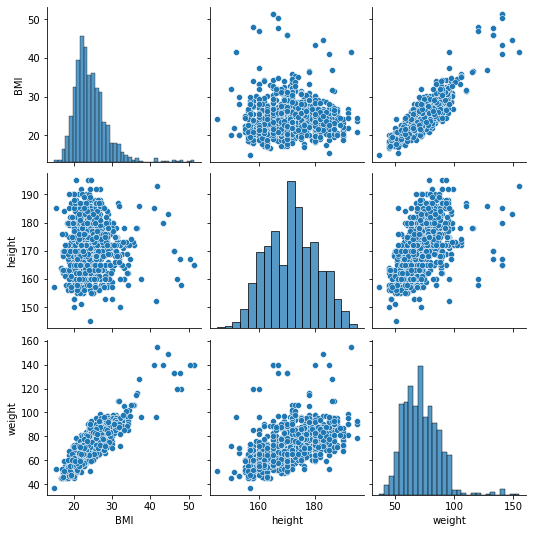

In [531]:
subsetColumns = df[["BMI", "height", "weight"]]
sns.pairplot(subsetColumns)
plt.show()

##### We can characterize the distribution as follows:
* Weight has a strong correlation with the BMI of the participants.
* Weight has a strong correlation with height of the participants.
* The distribution is skewed to the left.
* The distribution is normal (it's the curve).
* There are outliers when looking at the BMI and the height.

,id,city,gender,age,hh_size,education,education_1,height,weight,20-6-2013,...,6-5-2014,7-5-2014,8-5-2014,9-5-2014,10-5-2014,11-5-2014,12-5-2014,13-5-2014,average-steps,BMI
0,1,Bordeaux,0,25-34,4,4,Master or doctorate,178.0,98.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5133.875000,30.930438
1,2,Lille,0,35-44,1,3,Bachelor,180.0,77.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2826.371951,23.765432
2,3,Montpellier,0,25-34,2,2,Master or doctorate,180.0,83.0,0.0,...,0.0,0.0,0.0,6227.0,4567.0,2567.0,1129.0,0.0,3745.902439,25.617284
3,4,Lyon,0,<25,1,1,Bachelor,178.0,80.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,221.536585,25.249337
4,5,Montpellier,1,25-34,3,4,Bachelor,167.0,61.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,874.557927,21.872423
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
924,925,Lille,1,45-54,3,4,Master or doctorate,165.0,59.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1742.908537,21.671258
925,926,Lille,0,<25,3,5,Bachelor,192.0,90.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,731.689024,24.414062
926,927,Montpellier,0,35-44,2,2,Bachelor,181.0,71.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6268.954268,21.672110
927,928,Lille,1,55-64,1,1,High school,172.0,65.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3872.115854,21.971336


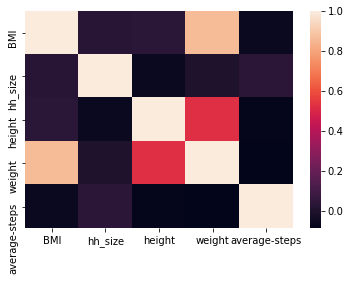

In [532]:
df['gender'].replace(to_replace=['Male', 'Female'], value=[0,1], inplace=True)

heatmap_subset = (df[["BMI", "hh_size", "height", "weight", "average-steps"]]).corr()
sns.heatmap(heatmap_subset)

df

In [533]:
from scipy.stats.stats import pearsonr #We will need the correlation function from the scientific package scipy
corr = df[["BMI", "hh_size", "height", "weight", "average-steps"]].corr() #I'm leaving out the corrected variables (divided by 1 million)
corr

,BMI,hh_size,height,weight,average-steps
BMI,1.000000,0.031850,0.035847,0.863813,-0.054819
hh_size,0.031850,1.000000,-0.053848,0.001758,0.038249
height,0.035847,-0.053848,1.000000,0.526307,-0.075928
weight,0.863813,0.001758,0.526307,1.000000,-0.086396
average-steps,-0.054819,0.038249,-0.075928,-0.086396,1.000000


There is no significance found between the BMI and hh_size.
There is no significance found between the BMI and height.
There is significance found between the BMI and weight.
There is no significance found between the BMI and average-steps.

There is no significance found between the hh-size and BMI.
There is no significance found between the hh-size and height.
There is no significance found between the hh-size and weight.
There is no significance found between the hh-size and average-steps.

There is no significance found between the height and BMI.
There is no significance found between the height and hh-size.
There is no significance found between the height and weight.
There is no significance found between the height and average-steps.

There is significance found between the weight and BMI.
There is no significance found between the weight and hh_size.
There is no significance found between the weight and height.
There is no significance found between the weight and average-steps.

There is no significance found between the average-steps and BMI.
There is no significance found between the average-steps and hh_size.
There is no significance found between the average-steps and height.
There is no significance found between the average-steps and weight.

/Users/stefanvanbrummelen/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:1182: UserWarning: The following kwargs were not used by contour: 'linewidth'
  cset = contour_func(


<AxesSubplot:xlabel='average-steps', ylabel='BMI'>

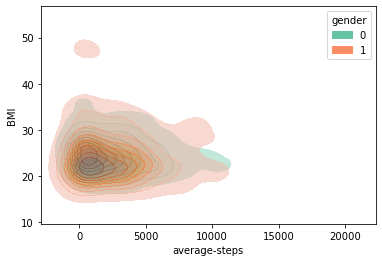

In [534]:
sns.kdeplot(
    data=df, x="average-steps", y="BMI", hue="gender", fill=True, common_norm=False, palette="Set2",
   alpha=.5, linewidth=0,
)

In [535]:
import matplotlib.pyplot as plt

plt.show()

corr = df[["BMI", "hh_size", "height", "weight", "average-steps"]].corr()
corr.style.background_gradient(cmap='coolwarm')

,BMI,hh_size,height,weight,average-steps
BMI,1.000000,0.031850,0.035847,0.863813,-0.054819
hh_size,0.031850,1.000000,-0.053848,0.001758,0.038249
height,0.035847,-0.053848,1.000000,0.526307,-0.075928
weight,0.863813,0.001758,0.526307,1.000000,-0.086396
average-steps,-0.054819,0.038249,-0.075928,-0.086396,1.000000


There is no significance found between the BMI and hh_size.
There is no significance found between the BMI and height.
There is significance found between the BMI and weight.
There is no significance found between the BMI and average-steps.

There is no significance found between the hh-size and BMI.
There is no significance found between the hh-size and height.
There is no significance found between the hh-size and weight.
There is no significance found between the hh-size and average-steps.

There is no significance found between the height and BMI.
There is no significance found between the height and hh-size.
There is no significance found between the height and weight.
There is no significance found between the height and average-steps.

There is significance found between the weight and BMI.
There is no significance found between the weight and hh_size.
There is no significance found between the weight and height.
There is no significance found between the weight and average-steps.

There is no significance found between the average-steps and BMI.
There is no significance found between the average-steps and hh_size.
There is no significance found between the average-steps and height.
There is no significance found between the average-steps and weight.

### Assignment 2: correlation 

##### Explanation of linear regression:
Modeling the relationship between a scalar response and one or more variables.

In [536]:
# Create dummy variables for the categorical variables

dfDummies = pd.get_dummies(df)
dfDummies.info()



<class 'pandas.core.frame.DataFrame'>
Int64Index: 922 entries, 0 to 928
Columns: 352 entries, id to education_1_Vocational
dtypes: float64(332), int64(4), uint8(16)
memory usage: 2.4 MB


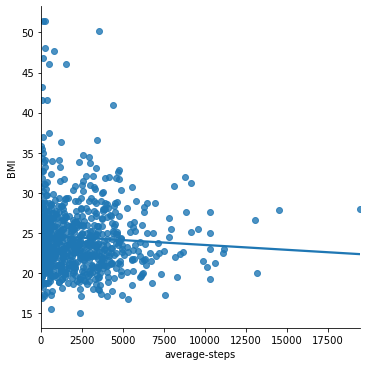

In [537]:
# Fit a linear regression model to predict the mean steps per participant, using the training data. (80% is training, 20% test)
# You can include all variables (easy), or you can try to find the combination that gives you the best fit (harder).

train, test = train_test_split(dfDummies, test_size=0.2)

sns.lmplot(x='average-steps', y='BMI', data=train, ci=True) #fit_reg=False
plt.xlabel('average-steps')
plt.ylabel('BMI')
plt.show()

##### We can characterize the distribution as follows:
* mean 2342.866085
* std 2438.096807

In [538]:
x = test[['BMI', 'gender', 'age_45-54', 'age_55-64', 'age_65+', 'age_<25', 'hh_size', 'education' ]]
y = test['average-steps']

# create a model
lm = LinearRegression()
lm.fit(x, y)

test['average-steps_p'] = lm.predict(x)

test[['BMI', 'average-steps', 'average-steps_p']]

<ipython-input-538-aee005aa1d2b>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['average-steps_p'] = lm.predict(x)


,BMI,average-steps,average-steps_p
809,25.059307,22.094512,2842.239519
147,24.859074,4829.021341,3013.756411
606,22.718974,5209.585366,4330.234341
855,23.836735,1323.664634,2203.780618
722,27.459822,508.618902,2100.897761
...,...,...,...
183,18.670934,2171.753049,3017.603698
502,25.880571,4268.615854,2343.252855
396,21.224490,31.926829,2951.134758
707,24.243918,1565.536585,2859.350669


In [539]:
r2_score(test['average-steps'], test['average-steps_p'])

0.07875620873561018

Based on the R^2, we can predict 7.8% of the variation of average steps. My prediction is off by 2254.7413104078764. As we can see in the residual plt, the errors decrease with average steps. Low BMI's are predicted too low and high BMI's are predicted too high. The model gives us a rough indication of the daily average steps of a person based on the BMI.

<ipython-input-549-3299574f9183>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['residual'] = test['average-steps'] - test['average-steps_p']


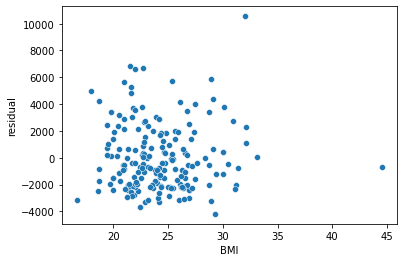

In [549]:
test['residual'] = test['average-steps'] - test['average-steps_p']
sns.scatterplot(x='BMI',y='residual',data=test)
plt.xlabel('BMI')
plt.ylabel('residual')
plt.plot()
plt.show()

In [508]:
math.sqrt(mean_squared_error(test['average-steps'], test['average-steps_p'])) #this gives the model fit (R2) for the Y and predicted Y

2254.7413104078764